# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier aperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de confusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification des nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
# np.genfromtxt() permet de lire un fichier CSV et de le convertir en tableau NumPy
# delimiter=',' : les valeurs sont séparées par des virgules
# dtype=int : conversion des valeurs en entiers

# Affichage des dimensions du tableau NumPy (nombre de lignes et de colonnes)
print(X.shape)
df = pd.read_csv("data.csv",nrows=5000)

(5000, 400)


In [3]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

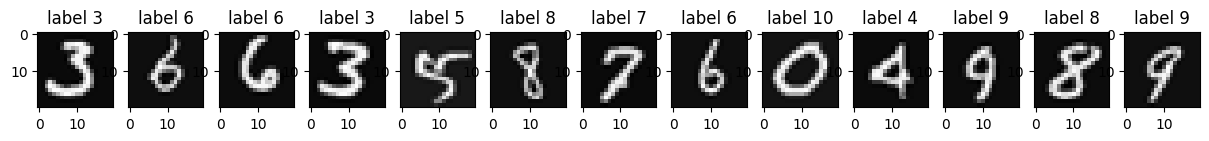

In [4]:
plt.figure(figsize=(15,8)) # Création d'une figure de taille 15x8 pouces
for i in range(13): #note: each 500 lines, there is a new value que 13 images 
    c = random.randint(X.shape[0]) #pick a random line from the dataset 
    a = X[c,:].reshape((20, 20)) #shape of one number in the image 
    a=np.transpose(a) # la transposé (rendre les ligne des colonne et vice versa)
    plt.subplot(1,13,i+1) # Création d'un sous-graphique pour afficher l'image
    plt.title('label '+ str(Y[c])) # Ajout du titre avec l'étiquette correspondante
    plt.imshow(a,cmap='gray') # Affichage de l'image en niveaux de gris

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de confusion :

In [5]:
def Matrice_confusion(y_true, y_pred, label=None): #y_true :liste des classes vraies, y_pred :liste des classes prédites, label: liste des noms des classes
    if label is None: #pas de label en entree 
        label = sorted(set(y_true) | set(y_pred)) # utilisation d'un ensemble pour éviter les doublons
    
    n_label=len(label)
    matrice=np.full((n_label, n_label), fill_value=0, dtype=int) #creer la matrice remplie de zero 
    # Dictionnaire pour associer chaque classe à un indice
    label_to_index = {classe: i for i, classe in enumerate(label)}
    for vrai, predit in zip(y_true, y_pred):
        matrice[label_to_index[vrai], label_to_index[predit]] += 1  # Incrémentation 
    #print(matrice)
    return matrice

#y_true = [0, 1, 2, 2, 0, 1, 1, 2, 0, 2]  # Classes réelles
#y_pred = [0, 0, 2, 2, 0, 1, 2, 1, 0, 2]  # Prédictions du modèle
#matrice_confusion(y_true, y_pred)


- Accuracy = (TP + TN)/(TP + TN + FP + FN)

In [6]:
def Accuracy(y_true, y_pred): 
    y_true = np.array(y_true)  # Conversion en tableau NumPy
    y_pred = np.array(y_pred)
    correct = np.sum(y_true == y_pred)  # si y_true et y_pred sont de meme classe donc on incremente de 1 sinon on aura 0
    total = len(y_true)  # Nombre total d'exemples
    #print(correct )
    return correct / total

#y_true = [0, 1, 2, 2, 0, 1, 1, 2, 0, 2]  # Classes réelles
#y_pred = [0, 0, 2, 2, 0, 1, 2, 1, 0, 2]  # Prédictions du modèle
#accuracy(y_true, y_pred)

- Recall (True Positive Rate) = TP/(TP + FN)

In [7]:
def Recall(y_true, y_pred, label):
    y_true = np.array(y_true)  # Conversion en tableau NumPy
    y_pred = np.array(y_pred)
    TP = np.sum((y_true == label) & (y_pred == label)) 
    # TP = nombre d'éléments qui appartiennent à la classe (y_true == label)
    # et qui ont été bien classés par le modèle (y_pred == label)
    FN = np.sum((y_true == label) & (y_pred != label)) 
    # FN = nombre d'éléments qui appartiennent à la classe (y_true == label) 
    #et ont été mal prédits (y_pred != label)
    if TP == 0 and FN == 0:
        recall = 0 # pour eviter la division par zéro
    else:
        recall = TP / (TP + FN)
    #print(recall,label)
    return recall

def AV_Recall(y_true,y_pred):
    labels = np.unique(y_true)  # prend uniquement les classes présentes
    total=sum(Recall(y_true, y_pred, label) for label in labels) #somme des recalls de toutes les classes 
    AV_recall=total/len(labels)
    #print(AV_recall)
    return AV_recall

#y_true = [0, 1, 2, 2, 0, 1, 1, 2, 0, 2]  # Classes réelles
#y_pred = [0, 0, 2, 2, 0, 1, 2, 1, 0, 2]  # Prédictions du modèle
#AV_Recall(y_true, y_pred)

- Précision = TP/(TP + FP)

In [8]:
def Precision(y_true, y_pred, label):
    y_true = np.array(y_true)  
    y_pred = np.array(y_pred)
    TP = np.sum((y_true == label) & (y_pred == label)) 
    FP = np.sum((y_true != label) & (y_pred == label)) 
    if TP + FP == 0:
        precision=0  # pour eviter la division par zéro
    else: precision = TP / (TP + FP)
    #print(precision,label)
    return precision

def AV_Precision(y_true,y_pred):
    labels = np.unique(y_true)  # prend uniquement les classes présentes
    total=sum(Precision(y_true, y_pred, label) for label in labels) #somme des precisions de toutes les classes 
    AV_precision=total/len(labels)
    #print(AV_precision)
    return AV_precision

#y_true = [0, 1, 2, 2, 0, 1, 1, 2, 0, 2]  # Classes réelles
#y_pred = [0, 0, 2, 2, 0, 1, 2, 1, 0, 2]  # Prédictions du modèle
#AV_Precision(y_true, y_pred)

- Taux de FP (False Positive Rate) = FP / (FP + TN)

In [9]:
def FPR(y_true, y_pred,label):
    y_true = np.array(y_true)  
    y_pred = np.array(y_pred)
    FP = np.sum((y_true != label) & (y_pred == label)) 
    #TN = somme de tous les éléments sauf ceux de la ligne et de la colonne de la classe 
    if (label == 10): 
        label =0
    TN = np.sum((y_true != label) & (y_pred != label))
    if(TN+FP==0):
        print (f'   The false positive rate of class {label}= 0' )
        return 0
    else: 
        print (f'   The false positive rate of class {label}= {FP / (FP+TN):.4f}' ) 
        return FP / (FP+TN)
    
def AV_FPR(y_true,y_pred):
    labels = np.unique(y_true)  # prend uniquement les classes présentes
    total=sum(FPR(y_true, y_pred, label) for label in labels) #somme des false positive rate de toutes les classes   
    return total/len(labels)

- Spécificité (True Negative Rate) = TN / (TN + FP)

In [10]:
def TNR(y_true, y_pred,label):
    y_true = np.array(y_true)  
    y_pred = np.array(y_pred)
    FP = np.sum((y_true != label) & (y_pred == label)) 
    #TN = somme de tous les éléments sauf ceux de la ligne et de la colonne de la classe 
    TN = np.sum((y_true != label) & (y_pred != label))
    if(TN+FP==0):
        print (f'  True negative rate of class {label}= 0' )
        return 0
    else: 
        print (f'   True negative rate of class {label}= {TN / (FP+TN):.4f}' )
        return TN / (FP+TN)
    
def AV_TNR(y_true,y_pred):
    labels = np.unique(y_true)  # prend uniquement les classes présentes
    total=sum(TNR(y_true, y_pred, label) for label in labels) #somme des false positive rate de toutes les classes  
    return total/len(labels)

- Courbe ROC

In [ ]:
def roc_curve(actual, predicted_probabilities):
    # Liste des seuils à utiliser pour binariser les prédictions de probabilité
    thresholds= [1,2,3,4,5,6,7,8,9,10]
    
    # Liste pour stocker les taux de vrais positifs (TPR)
    tpr_list = []  
    
    # Liste pour stocker les taux de faux positifs (FPR)
    fpr_list = []  
    
    # Boucle à travers chaque seuil
    for threshold in thresholds:
        # Binarisation des prédictions de probabilité en utilisant le seuil actuel
        labels=[1,2,3,4,5,6,7,8,9,10]
        predicted_labels = [1 if prob >= threshold else 0 for prob in predicted_probabilities]  
        #Cela permet de convertir les prédictions de probabilité en prédictions binaires.
        
        # Calcul du taux de vrais positifs (TPR) en utilisant la fonction recall_score
        tpr = AV_Recall(actual, predicted_labels, labels)
        
        # Calcul du taux de faux positifs (FPR) en utilisant la fonction false_positive_rate
        fpr = FPR(actual, predicted_labels, labels)
        
        # Ajout du TPR calculé à la liste des TPR
        tpr_list.append(tpr)
        
        # Ajout du FPR calculé à la liste des FPR
        fpr_list.append(fpr)

    # Retourne les listes des TPR et FPR calculés
    return tpr_list, fpr_list

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [12]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
Xt, Xtt, Yt, Ytt = train_test_split(
      scaled_features, Y, test_size = 0.30)

# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [13]:
#Partie implementation de KNN : Ait Moussa Ali 
#Definir une fonction qui permet de calculer la distance entre deux points
def calculate_distance(point1,point2):
    return np.linalg.norm(point1 - point2)

#Definir une fonction qui permet de predire la classe d'un point (version avec numpy functions)
def KNN(X_train, Y_train, X_test, k):
    predictions = []
    for c in X_test:
        distances = np.array([calculate_distance(c, x) for x in X_train]) #calcul de la distance entre chaque point de x_test et tous les points de X_train
        k_indices = np.argsort(distances)[:k] #recuperation des indices des k plus petites distances
        k_nearest_labels = Y_train[k_indices] #recuperation des labels des k plus proches voisins
        prediction = np.argmax(np.bincount(k_nearest_labels)) #recuperation de la classe ayant la plus grande occurence
        predictions.append(prediction) #ajout de la prediction au tableau de prediction
    
    return predictions #retourner le tableau de prediction
#Definir une fonction qui permet de predire la classe d'un point (version sans numpy functions)
def KNN_2(X_train, Y_train, X_test, k):
    prediction = np.array([]) #initialisation du tableau de prediction
    occuerence = np.array([0]*(max(Y_train)+1)) #initialisation du tableau d'occurence
    for c in X_test:
        distance = np.array([])
        for i in X_train:
            distance = np.append(distance,calculate_distance(c,i)) #calcul de la distance entre le point c et tous les points de X_train
        
        distances = np.sort(distance) #tri des distances
        distances = distances[:k] #selection des k plus petites distances
        for i in distances:
            index = np.where(distance == i) #recuperation de l'indice de la distance
            occuerence[Y_train[index]] += 1 #incrementation de l'occurence de la classe correspondante
        prediction = np.append(prediction,np.argmax(occuerence)) #recuperation de la classe ayant la plus grande occurence avec argmax
        occuerence = np.array([0]*(max(Y_train)+1)) #reinitialisation du tableau d'occurence
    return prediction #retourner le tableau de prediction


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division en train et test
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, test_size=0.3, random_state=42)

# Appliquer KNN (ma version)
k = 3
y_pred_knn = KNN(Xt, Yt, Xtt, k)

# Appliquer KNN (sklearn)
sklearn_knn = KNeighborsClassifier(n_neighbors=k)
sklearn_knn.fit(Xt, Yt)
y_pred_sklearn = sklearn_knn.predict(Xtt)
# Calcul des métriques (ma version)
mat_conf = Matrice_confusion(Ytt, y_pred_knn)
acc = Accuracy(Ytt, y_pred_knn)
avg_rec = AV_Recall(Ytt, y_pred_knn)
avg_prec = AV_Precision(Ytt, y_pred_knn)

# Calcul des métriques (sklearn)
mat_conf_sklearn = confusion_matrix(Ytt, y_pred_sklearn)
acc_sklearn = accuracy_score(Ytt, y_pred_sklearn)
recall_sklearn = recall_score(Ytt, y_pred_sklearn, average='macro')
precision_sklearn = precision_score(Ytt, y_pred_sklearn, average='macro')

# Affichage des résultats
print("Comparaison des résultats")
print(f"Matrice de confusion (Ma version) :\n{mat_conf}")
print(f"Matrice de confusion (sklearn) :\n{mat_conf_sklearn}")
print(f"Accuracy (Ma version) : {acc:.4f}")
print(f"Accuracy (sklearn) : {acc_sklearn:.4f}")
print(f"Recall (Ma version) : {avg_rec:.4f}")
print(f"Recall (sklearn) : {recall_sklearn:.4f}")
print(f"Precision (Ma version) : {avg_prec:.4f}")
print(f"Precision (sklearn) : {precision_sklearn:.4f}")

Comparaison des résultats
Matrice de confusion (Ma version) :
[[150   2   0   0   0   0   0   0   0   0]
 [  5 124   5   5   2   5   3   4   0   2]
 [  4   6 136   1   1   0   1   1   3   1]
 [  6   2   0 121   2   0   0   1  11   0]
 [  4   1  10   3 117   1   0   3   1   1]
 [  0   2   0   2   3 130   0   0   0   6]
 [  8   1   2   9   0   0 130   0   8   0]
 [  1   1   8   1   9   0   0 107   1   4]
 [  2   0   3  12   0   0  10   0 130   1]
 [  0   2   1   1   1   1   0   0   0 158]]
Matrice de confusion (sklearn) :
[[150   2   0   0   0   0   0   0   0   0]
 [  5 124   5   5   2   5   3   4   0   2]
 [  4   6 136   1   1   0   1   1   3   1]
 [  6   2   0 121   2   0   0   1  11   0]
 [  4   1  10   3 117   1   0   3   1   1]
 [  0   2   0   2   3 130   0   0   0   6]
 [  8   1   2   9   0   0 130   0   8   0]
 [  1   1   8   1   9   0   0 107   1   4]
 [  2   0   3  12   0   0  10   0 130   1]
 [  0   2   1   1   1   1   0   0   0 158]]
Accuracy (Ma version) : 0.8687
Accuracy (sk

# Méthode 1: MVS
Machine à Vecteurs de Support

In [15]:
#Créer le modèle
model= svm.SVC(kernel='linear') 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)
#definir les classes 
labels = [1, 2,3,4,5,7,8,9,10]
# calcul des metriques 
matrice_confusion = Matrice_confusion(Ytt, y_pred)  
accuracy = Accuracy(Ytt, y_pred)  
recall = AV_Recall(Ytt, y_pred)  
precision = AV_Precision(Ytt, y_pred)  

# Affichage
print("SVM:")
print("Confusion Matrix:")
print(matrice_confusion)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

print("- False Positive Rate of each class: ")
false_positive_rate = AV_FPR(Ytt, y_pred)
print(f"False positive rate: {false_positive_rate:.4f}")
print("- True Negative Rate of each class: ")
true_negative_rate = AV_TNR(Ytt, y_pred)
print(f"True negative rate: {true_negative_rate:.4f}")

SVM:
Confusion Matrix:
[[148   1   0   0   1   0   0   0   2   0]
 [  2 136   4   3   2   1   0   7   0   0]
 [  2   5 134   1   5   1   1   3   2   0]
 [  0   3   0 129   0   0   1   1   9   0]
 [  3   0  12   3 123   0   0   0   0   0]
 [  0   0   0   0   1 139   0   0   0   3]
 [  3   2   0   3   1   1 142   1   5   0]
 [  2   5   2   0   5   1   0 116   1   0]
 [  0   0   1   7   2   1   6   0 140   1]
 [  0   1   0   0   0   0   0   1   0 162]]
Accuracy: 0.9126666666666666
Recall: 0.9119102618571624
Precision: 0.9119414964517899
- False Positive Rate of each class: 
   The false positive rate of class 1= 0.0089
   The false positive rate of class 2= 0.0126
   The false positive rate of class 3= 0.0141
   The false positive rate of class 4= 0.0125
   The false positive rate of class 5= 0.0125
   The false positive rate of class 6= 0.0037
   The false positive rate of class 7= 0.0060
   The false positive rate of class 8= 0.0095
   The false positive rate of class 9= 0.0142
   The f

2


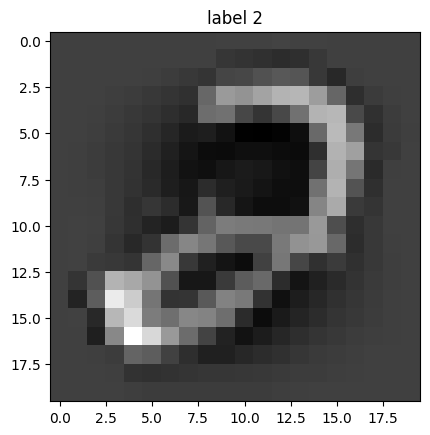

In [16]:
# tester une image
c= 3
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 2: Arbres de décision


In [17]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)
# calcul des metriques 
matrice_confusion = Matrice_confusion(Ytt, y_pred)  
accuracy = Accuracy(Ytt, y_pred)  
recall = AV_Recall(Ytt, y_pred)  
precision = AV_Precision(Ytt, y_pred)  

# Affichage
print("Arbre de decision:")
print("Confusion Matrix:")
print(matrice_confusion)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

print("- False Positive Rate of each class: ")
false_positive_rate = AV_FPR(Ytt, y_pred)
print(f"False positive rate: {false_positive_rate:.4f}")
print("- True Negative Rate of each class: ")
true_negative_rate = AV_TNR(Ytt, y_pred)
print(f"True negative rate: {true_negative_rate:.4f}")

Arbre de decision:
Confusion Matrix:
[[133   1   3   2   0   2   2   6   3   0]
 [  2 109   5   9   3   3   4   9   7   4]
 [  4  10  93   1  20   2   4   9   6   5]
 [  3   4   0 114   1   3   4   5   8   1]
 [  2   3  12   4  97   4   2   9   6   2]
 [  1   5   1   2   5 114   1   4   4   6]
 [  5   5   4   3   1   0 124   4   9   3]
 [  0   7   4   4   9   4   0  93   9   2]
 [  1   5   0  13   5   0  16   9 108   1]
 [  1   3   3   1   2   2   1   0   1 150]]
Accuracy: 0.7566666666666667
Recall: 0.7552004798431324
Precision: 0.7556336173246022
- False Positive Rate of each class: 
   The false positive rate of class 1= 0.0141
   The false positive rate of class 2= 0.0320
   The false positive rate of class 3= 0.0238
   The false positive rate of class 4= 0.0287
   The false positive rate of class 5= 0.0338
   The false positive rate of class 6= 0.0147
   The false positive rate of class 7= 0.0253
   The false positive rate of class 8= 0.0402
   The false positive rate of class 9= 0

2


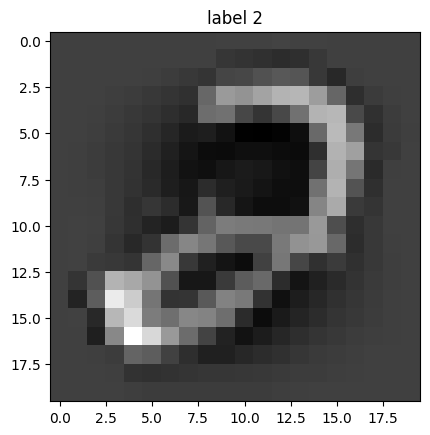

In [18]:
# tester une image
c= 3
print (y_pred[c])
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 3: RN 
Réseaux de neurones Perceptron

In [19]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

y_pred = model.predict(Xtt)
# calcul des metriques 
matrice_confusion = Matrice_confusion(Ytt, y_pred)  
accuracy = Accuracy(Ytt, y_pred)  
recall = AV_Recall(Ytt, y_pred)  
precision = AV_Precision(Ytt, y_pred)  

# Affichage
print("RN MLP:")
print("Confusion Matrix:")
print(matrice_confusion)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

print("- False Positive Rate of each class: ")
false_positive_rate = AV_FPR(Ytt, y_pred)
print(f"False positive rate: {false_positive_rate:.4f}")
print("- True Negative Rate of each class: ")
true_negative_rate = AV_TNR(Ytt, y_pred)
print(f"True negative rate: {true_negative_rate:.4f}")

RN MLP:
Confusion Matrix:
[[341   2   0   2   2   1   0   3   0   0]
 [  6 310   8   5   1   3   7   9   1   4]
 [  4  11 306   1  15   1   5   8   6   1]
 [  1   4   1 303   2   6   1   3  15   2]
 [  2   4   9   7 302   4   3   7   8   5]
 [  2   1   0   0   5 327   0   1   1   6]
 [  8   6   3   6   0   1 307   1  16   2]
 [  5   8  12   6  12   4   0 290   8   5]
 [  4   2   6   8   1   0  12   1 310   7]
 [  0   0   3   1   4   3   1   0   0 342]]
Accuracy: 0.8965714285714286
Recall: 0.8967172987591789
Precision: 0.8965598923269535
- False Positive Rate of each class: 
   The false positive rate of class 1= 0.0102
   The false positive rate of class 2= 0.0121
   The false positive rate of class 3= 0.0134
   The false positive rate of class 4= 0.0114
   The false positive rate of class 5= 0.0133
   The false positive rate of class 6= 0.0073
   The false positive rate of class 7= 0.0092
   The false positive rate of class 8= 0.0105
   The false positive rate of class 9= 0.0175
   Th

In [20]:
# Choisir un image de test 
c=0

In [21]:
model.predict([Xtt[c,:]])

array([10])

In [29]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

from sklearn.preprocessing import label_binarize

y_proba = model.predict_proba(Xtt)
num_classes = len(np.unique(Y))
Ytt_bin = label_binarize(Ytt, classes=np.unique(Y))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(Ytt_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend()
plt.show()

ValueError: X has 400 features, but MLPClassifier is expecting 4 features as input.

Afficher l'image testée

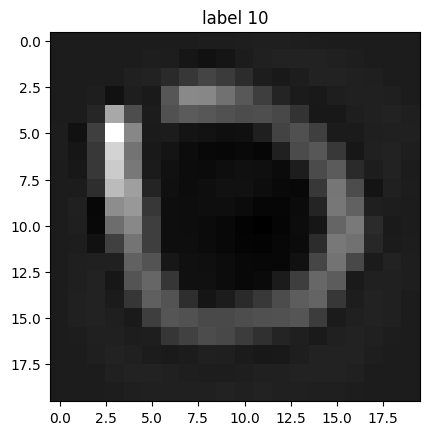

In [23]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Appliquer les métriques implementées pour voir le résultat et comparer les avec celles des librairies de python

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

matrice_sklearn = confusion_matrix(Ytt, y_pred)
accuracy_sklearn = accuracy_score(Ytt, y_pred)
recall_sklearn = recall_score(Ytt, y_pred, average="macro")  # "macro" : moyenne sur toutes les classes
precision_sklearn = precision_score(Ytt, y_pred, average="macro")

# Affichage des résultats
print("\n=== Comparaison des résultats ===")
print(f"Matrice de confusion (Ma version) :\n{matrice_confusion}")
print(f"Matrice de confusion (sklearn) :\n{matrice_sklearn}")

print(f"Accuracy (Ma version) : {accuracy:.4f}")
print(f"Accuracy (sklearn) : {accuracy_sklearn:.4f}")

print(f"Recall (Ma version) : {recall:.4f}")
print(f"Recall (sklearn) : {recall_sklearn:.4f}")

print(f"Precision (Ma version) : {precision:.4f}")
print(f"Precision (sklearn) : {precision_sklearn:.4f}")



=== Comparaison des résultats ===
Matrice de confusion (Ma version) :
[[341   2   0   2   2   1   0   3   0   0]
 [  6 310   8   5   1   3   7   9   1   4]
 [  4  11 306   1  15   1   5   8   6   1]
 [  1   4   1 303   2   6   1   3  15   2]
 [  2   4   9   7 302   4   3   7   8   5]
 [  2   1   0   0   5 327   0   1   1   6]
 [  8   6   3   6   0   1 307   1  16   2]
 [  5   8  12   6  12   4   0 290   8   5]
 [  4   2   6   8   1   0  12   1 310   7]
 [  0   0   3   1   4   3   1   0   0 342]]
Matrice de confusion (sklearn) :
[[341   2   0   2   2   1   0   3   0   0]
 [  6 310   8   5   1   3   7   9   1   4]
 [  4  11 306   1  15   1   5   8   6   1]
 [  1   4   1 303   2   6   1   3  15   2]
 [  2   4   9   7 302   4   3   7   8   5]
 [  2   1   0   0   5 327   0   1   1   6]
 [  8   6   3   6   0   1 307   1  16   2]
 [  5   8  12   6  12   4   0 290   8   5]
 [  4   2   6   8   1   0  12   1 310   7]
 [  0   0   3   1   4   3   1   0   0 342]]
Accuracy (Ma version) : 0.8966
Acc

# Refaire le processus sur un autre dataset de votre choix (exemple: iris...)

In [25]:
from sklearn import datasets

# 1. Chargement du dataset Iris
data = datasets.load_iris()
X = data.data
y = data.target

# 2. Exploration des données
print("Aperçu des caractéristiques:")
print(pd.DataFrame(X, columns=data.feature_names).head())

# 3. Prétraitement des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Entraînement des modèles
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Confusion Matrix": Matrice_confusion(y_test, y_pred),
        "Classification Report": AV_Recall(y_test, y_pred)
    }

# 6. Affichage des résultats
for name, result in results.items():
    print(f"\n{name}:")
    print("Matrice de confusion:\n", result["Confusion Matrix"])
    print("Rapport de classification:\n", result["Classification Report"])


Aperçu des caractéristiques:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Decision Tree:
Matrice de confusion:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Rapport de classification:
 1.0

Neural Network:
Matrice de confusion:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Rapport de classification:
 1.0


c:\Users\Techno Matique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
